# Experiment 9

## What is Apriori Algorithm?

<b>Apriori algorithm</b> was the first algorithm that was proposed for frequent itemset mining. It was later improved by R Agarwal and R Srikant and came to be known as Apriori. This algorithm uses two steps “join” and “prune” to reduce the search space. It is an iterative approach to discover the most frequent itemsets.

Apriori says:

    The probability that item I is not frequent is if:
<ul>
    <li>P(I) < minimum support threshold, then I is not frequent.</li>
    <li>P (I+A) < minimum support threshold, then I+A is not frequent, where A also belongs to itemset.</li>
    <li>If an itemset set has value less than minimum support then all of its supersets will also fall below min support, and thus can be ignored. This property is called the Antimonotone property.</li>
</ul>

The steps followed in the Apriori Algorithm of data mining are:
<ul>
    <li>Join Step: This step generates (K+1) itemset from K-itemsets by joining each item with itself.</li>
    <li>Prune Step: This step scans the count of each item in the database. If the candidate item does not meet minimum support, then it is regarded as infrequent and thus it is removed. This step is performed to reduce the size of the candidate itemsets.</li>
   </ul>
Steps In Apriori
Apriori algorithm is a sequence of steps to be followed to find the most frequent itemset in the given database. This data mining technique follows the join and the prune steps iteratively until the most frequent itemset is achieved. A minimum support threshold is given in the problem or it is assumed by the user.

1) In the first iteration of the algorithm, each item is taken as a 1-itemsets candidate. The algorithm will count the occurrences of each item.

2) Let there be some minimum support, min_sup ( eg 2). The set of 1 – itemsets whose occurrence is satisfying the min sup are determined. Only those candidates which count more than or equal to min_sup, are taken ahead for the next iteration and the others are pruned.

3) Next, 2-itemset frequent items with min_sup are discovered. For this in the join step, the 2-itemset is generated by forming a group of 2 by combining items with itself.

4) The 2-itemset candidates are pruned using min-sup threshold value. Now the table will have 2 –itemsets with min-sup only.

5) The next iteration will form 3 –itemsets using join and prune step. This iteration will follow antimonotone property where the subsets of 3-itemsets, that is the 2 –itemset subsets of each group fall in min_sup. If all 2-itemset subsets are frequent then the superset will be frequent otherwise it is pruned.

6) Next step will follow making 4-itemset by joining 3-itemset with itself and pruning if its subset does not meet the min_sup criteria. The algorithm is stopped when the most frequent itemset is achieved.

Apriori Steps:
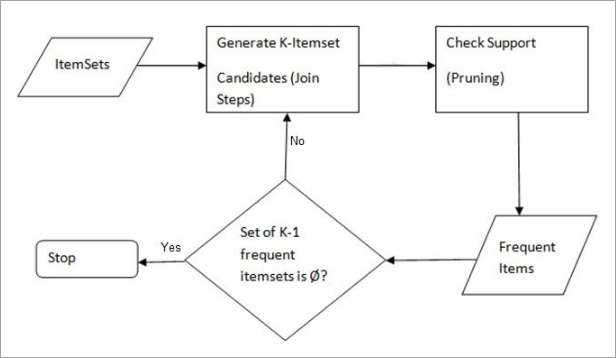

## Implementation of Apriori

In [1]:
data <- read.csv('e9.csv')

In [2]:
head(data)

Transaction_ID,List_of_items
T100,"I1,I2,I5"
T200,"I2,I4"
T300,"I2,I3"
T400,"I1,I2,I4"
T500,"I1,I3"
T600,"I2,I3"


In [3]:
install.packages('arules')

package 'arules' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Rushank Shah\AppData\Local\Temp\RtmpO2f5RC\downloaded_packages


In [4]:
install.packages('arulesViz', dependencies = TRUE)

Warning message:
"dependencies 'graph', 'Rgraphviz' are not available"

package 'arulesViz' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Rushank Shah\AppData\Local\Temp\RtmpO2f5RC\downloaded_packages


In [5]:
library(arules)
library(arulesViz)

Warning message:
"package 'arules' was built under R version 3.6.3"Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Warning message:
"package 'arulesViz' was built under R version 3.6.3"

In [6]:
data

Transaction_ID,List_of_items
T100,"I1,I2,I5"
T200,"I2,I4"
T300,"I2,I3"
T400,"I1,I2,I4"
T500,"I1,I3"
T600,"I2,I3"
T700,"I1,I3"
T800,"I1,I2,I3,I5"
T900,"I1,I2,I3"


In [7]:
txn = read.transactions(file="items.csv", rm.duplicates= TRUE, format="basket",sep=",",cols=1);

In [8]:
inspect(txn)

    items         transactionID
[1] {I1,I2,I5}    T100         
[2] {I2,I4}       T200         
[3] {I2,I3}       T300         
[4] {I1,I2,I4}    T400         
[5] {I1,I3}       T500         
[6] {I2,I3}       T600         
[7] {I1,I3}       T700         
[8] {I1,I2,I3,I5} T800         
[9] {I1,I2,I3}    T900         


In [9]:
basket_rules <- apriori(txn,parameter = list(sup = 0.2, conf = 0.5));

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.2      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5 item(s), 9 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [18 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [10]:
inspect(basket_rules)

     lhs        rhs  support   confidence coverage  lift      count
[1]  {}      => {I3} 0.6666667 0.6666667  1.0000000 1.0000000 6    
[2]  {}      => {I1} 0.6666667 0.6666667  1.0000000 1.0000000 6    
[3]  {}      => {I2} 0.7777778 0.7777778  1.0000000 1.0000000 7    
[4]  {I4}    => {I2} 0.2222222 1.0000000  0.2222222 1.2857143 2    
[5]  {I5}    => {I1} 0.2222222 1.0000000  0.2222222 1.5000000 2    
[6]  {I5}    => {I2} 0.2222222 1.0000000  0.2222222 1.2857143 2    
[7]  {I3}    => {I1} 0.4444444 0.6666667  0.6666667 1.0000000 4    
[8]  {I1}    => {I3} 0.4444444 0.6666667  0.6666667 1.0000000 4    
[9]  {I3}    => {I2} 0.4444444 0.6666667  0.6666667 0.8571429 4    
[10] {I2}    => {I3} 0.4444444 0.5714286  0.7777778 0.8571429 4    
[11] {I1}    => {I2} 0.4444444 0.6666667  0.6666667 0.8571429 4    
[12] {I2}    => {I1} 0.4444444 0.5714286  0.7777778 0.8571429 4    
[13] {I1,I5} => {I2} 0.2222222 1.0000000  0.2222222 1.2857143 2    
[14] {I2,I5} => {I1} 0.2222222 1.0000000  0.2222

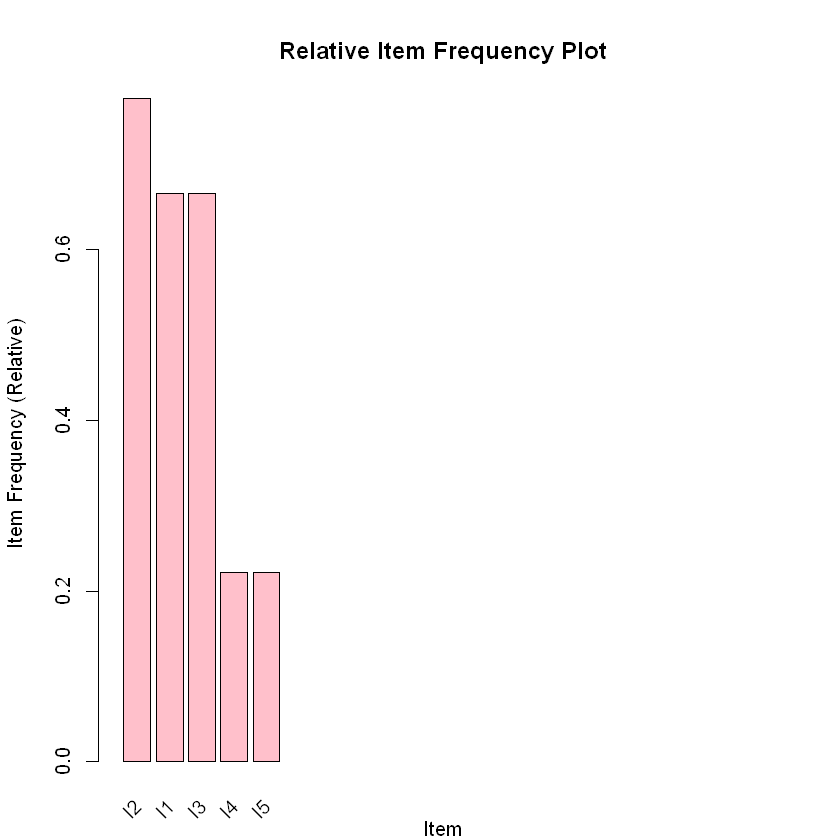

In [11]:
itemFrequencyPlot(txn, topN = 20, 
                          col = "Pink",
                          main = 'Relative Item Frequency Plot',
                          type = "relative",
                          ylab = "Item Frequency (Relative)",
                          xlab = "Item"
                 )

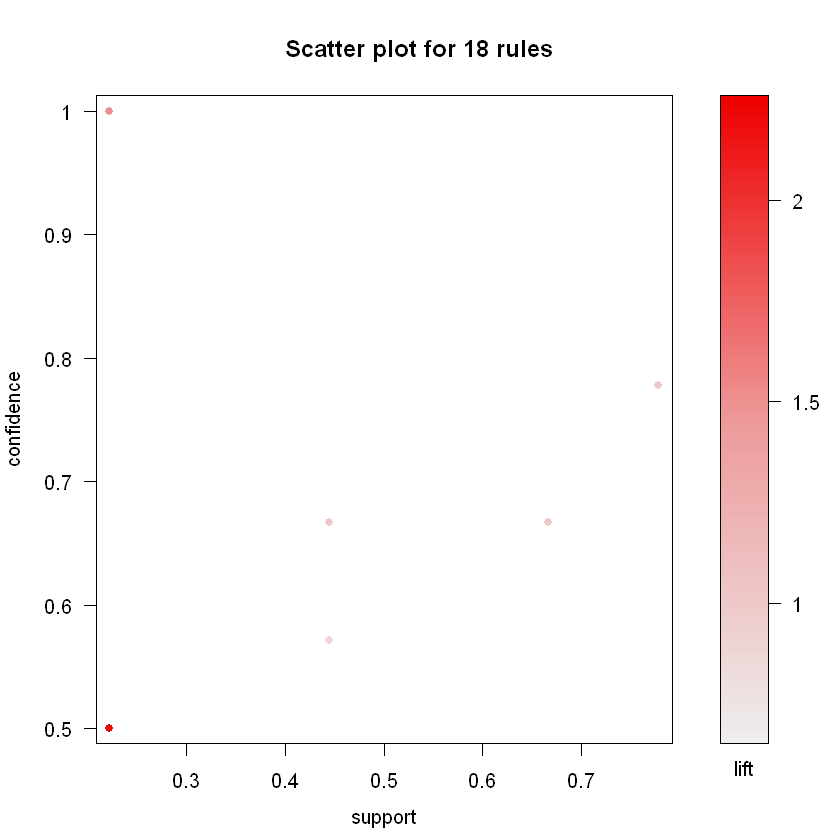

In [12]:
plot(basket_rules, jitter = 0)

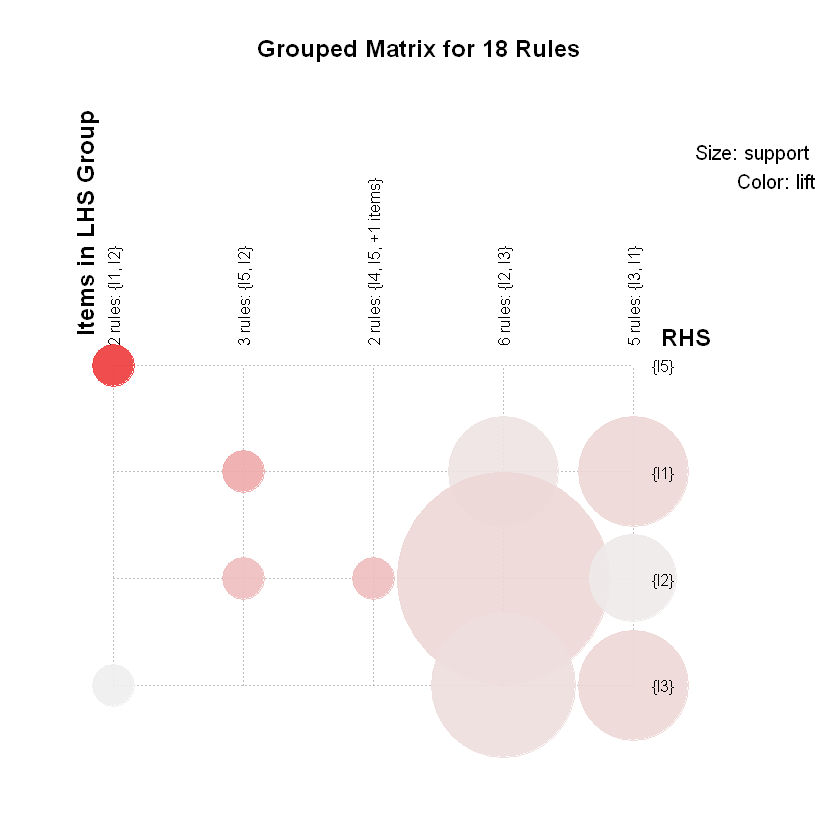

In [13]:
plot(basket_rules, method = "grouped", control = list(k = 5))

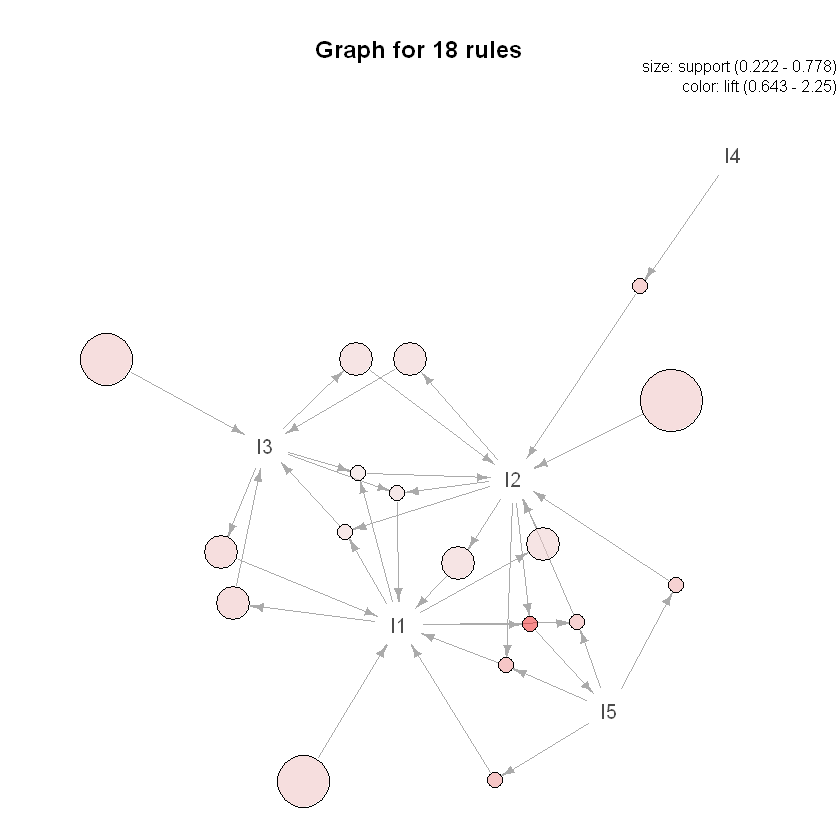

In [14]:
plot(basket_rules, method="graph")

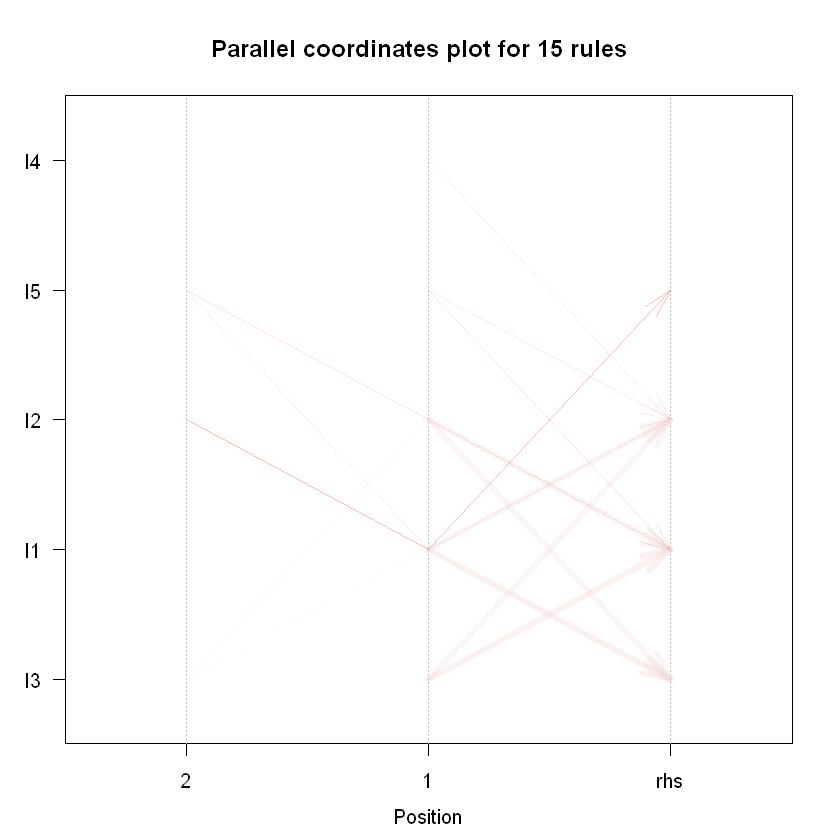

In [15]:
plot(basket_rules, method="paracoord",  control=list(alpha=.5, reorder=TRUE))